# Аналитика в авиакомпании

# Описание проекта  
  
Цель проекта: Изучить базу данных и проанализировать спрос пассажиров на рейсы в городах, где проходят крупнейшие фестивали.  
  
# Этапы проекта:  
   
1. Импортировать файлы  
2. Изучить данные в них  
3. Проверить типы данных на корректность  
4. Выбрать топ-10 городов по количеству рейсов  
5. Построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов  
6. Сделать выводы по каждому из графиков, пояснить результат  


# 1. Импортируем файлы

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

# 2. Изучим данные

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [3]:
display(query_1)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
query_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


**Вывод:**  
Всего в данных 8 моделей самолетов.  
Чаще всего летают Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100.  
Реже всего - Boeing 777-300.

In [5]:
query_3 = pd.read_csv('/datasets/query_3.csv')
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [6]:
display(query_3)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [7]:
query_3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Вывод: В данных представлены перелеты из 101 города.  
Среднее количество перелетов составляет 5.5, минимальное - 1, максимальное - 129.8.  

# 3. Проверим типы данных на корректность

In [8]:
# изменим тип данных в колонке average_flights на int
query_3['average_flights'] = query_3['average_flights'].astype('int')
query_3.describe()

,average_flights
count,101.000000
mean,5.217822
std,13.061090
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,129.000000


# 4. Выберем топ-10 городов по количеству рейсов

In [9]:
top_10_cities=query_3.sort_values(by='average_flights', ascending=False).head(10)
top_10_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 43 to 73
Data columns (total 2 columns):
city               10 non-null object
average_flights    10 non-null int64
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [10]:
display(top_10_cities)

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


In [11]:
top_10_cities.describe()

,average_flights
count,10.000000
mean,24.700000
std,37.259003
min,9.000000
25%,10.000000
50%,10.500000
75%,15.500000
max,129.000000


**Вывод:**  
Топ-10 городов по количеству рейсов: Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск.  
Среднее количество перелетов среди этих городов составляет 25.

# 5. Построим графики

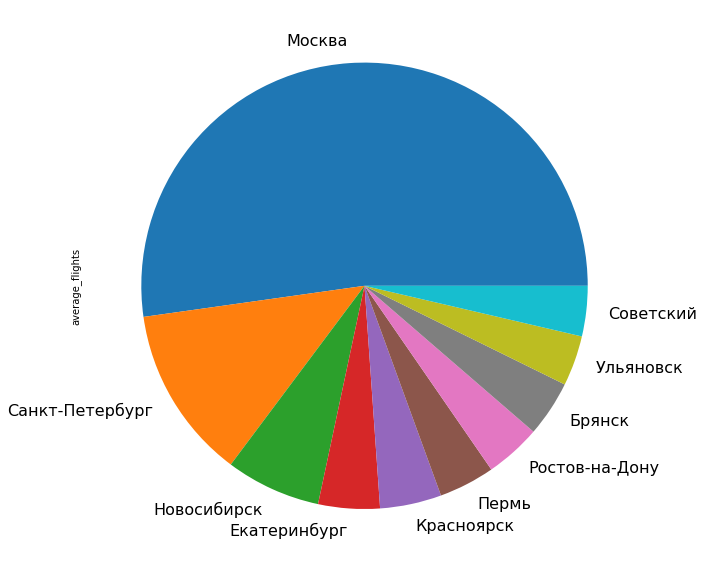

In [13]:
# построим круговую диаграмму с топ-10 городов и количеством рейсов
top_10_cities.average_flights.plot(kind='pie', labels=top_10_cities['city'], x = 'city', fontsize=16, figsize=(10,12))
plt.show()

**Вывод:**  
С большим отрывом по количеству рейсов лидирует Москва.  
Кроме того в тройку лидеров входят Санкт-Петербург и Новосибирск.  
В оставшихся городах примерно равное количество перелетов.  
Такой разброс связан с населением городов:
Москва - 11,92 млн чел,  
Санкт-Петербург - 4,991 млн чел,
Новосибирск - 1,511 млн чел,
Екатеринбург - 1,387 млн чел,
Красноярск - 1,007 млн чел,
Пермь - 1,007 млн чел,
Ростов-на-Дону - 1,1 млн чел,
Брянск - 412 тыс чел,
Ульяновск - 615 тыс чел,
Советский - 29 тыс чел.

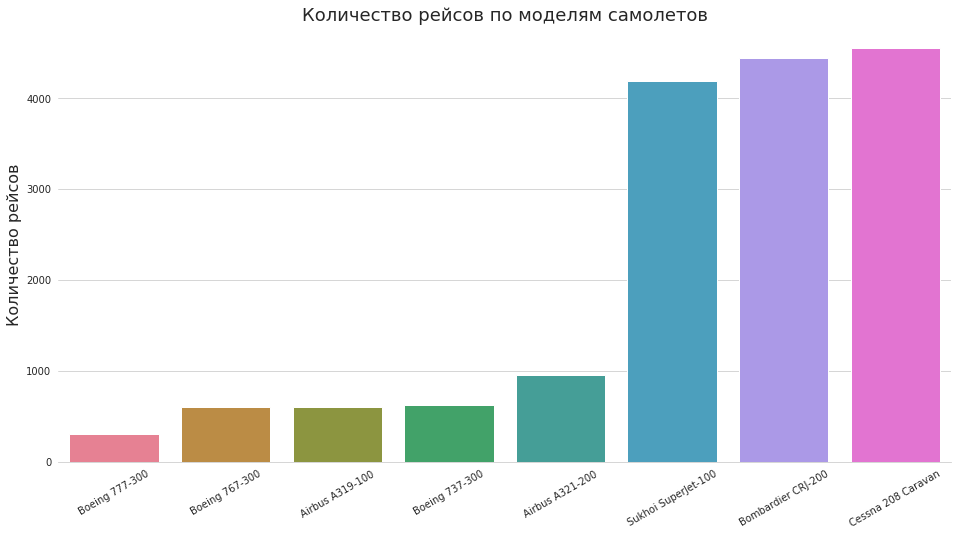

In [14]:
# построим график с моделями самолетов и количеством рейсов
flights_model = query_1.sort_values(by='flights_amount')

palette = 'husl'
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
plt.title('Количество рейсов по моделям самолетов', fontsize=18)
sns.barplot(x='model', y='flights_amount', data=flights_model, label="line", palette=palette)
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('Количество рейсов', fontsize=16)
plt.xticks(rotation=30)
plt.show()

**Вывод:**  
Больше всего перелетов совершают следующие модели самолетов: Cessna 208 Caravan (13 мест), Bombardier CRJ-200 (40-50 мест), Sukhoi SuperJet-100 (93-103 места). Скорее всего, это связано с тем, что в данных самолетах меньше всего посадочных мест, и они летают на небольшие расстояния, поэтому совершают больше перелетов.  
Самолеты с большим количеством посадочных мест летают в разы реже - Airbus A319-100 (138 мест), Airbus A321-200	(220 мест), Boeing 737-300 (149 мест), Boeing 767-300 (330 мест), Boeing 777-300 (305-550 мест). Это связано с тем, что их перелеты длятся дольше. Меньше всего перелетов у самого вместительного самолета - Boeing 777-300 (305-550 мест).

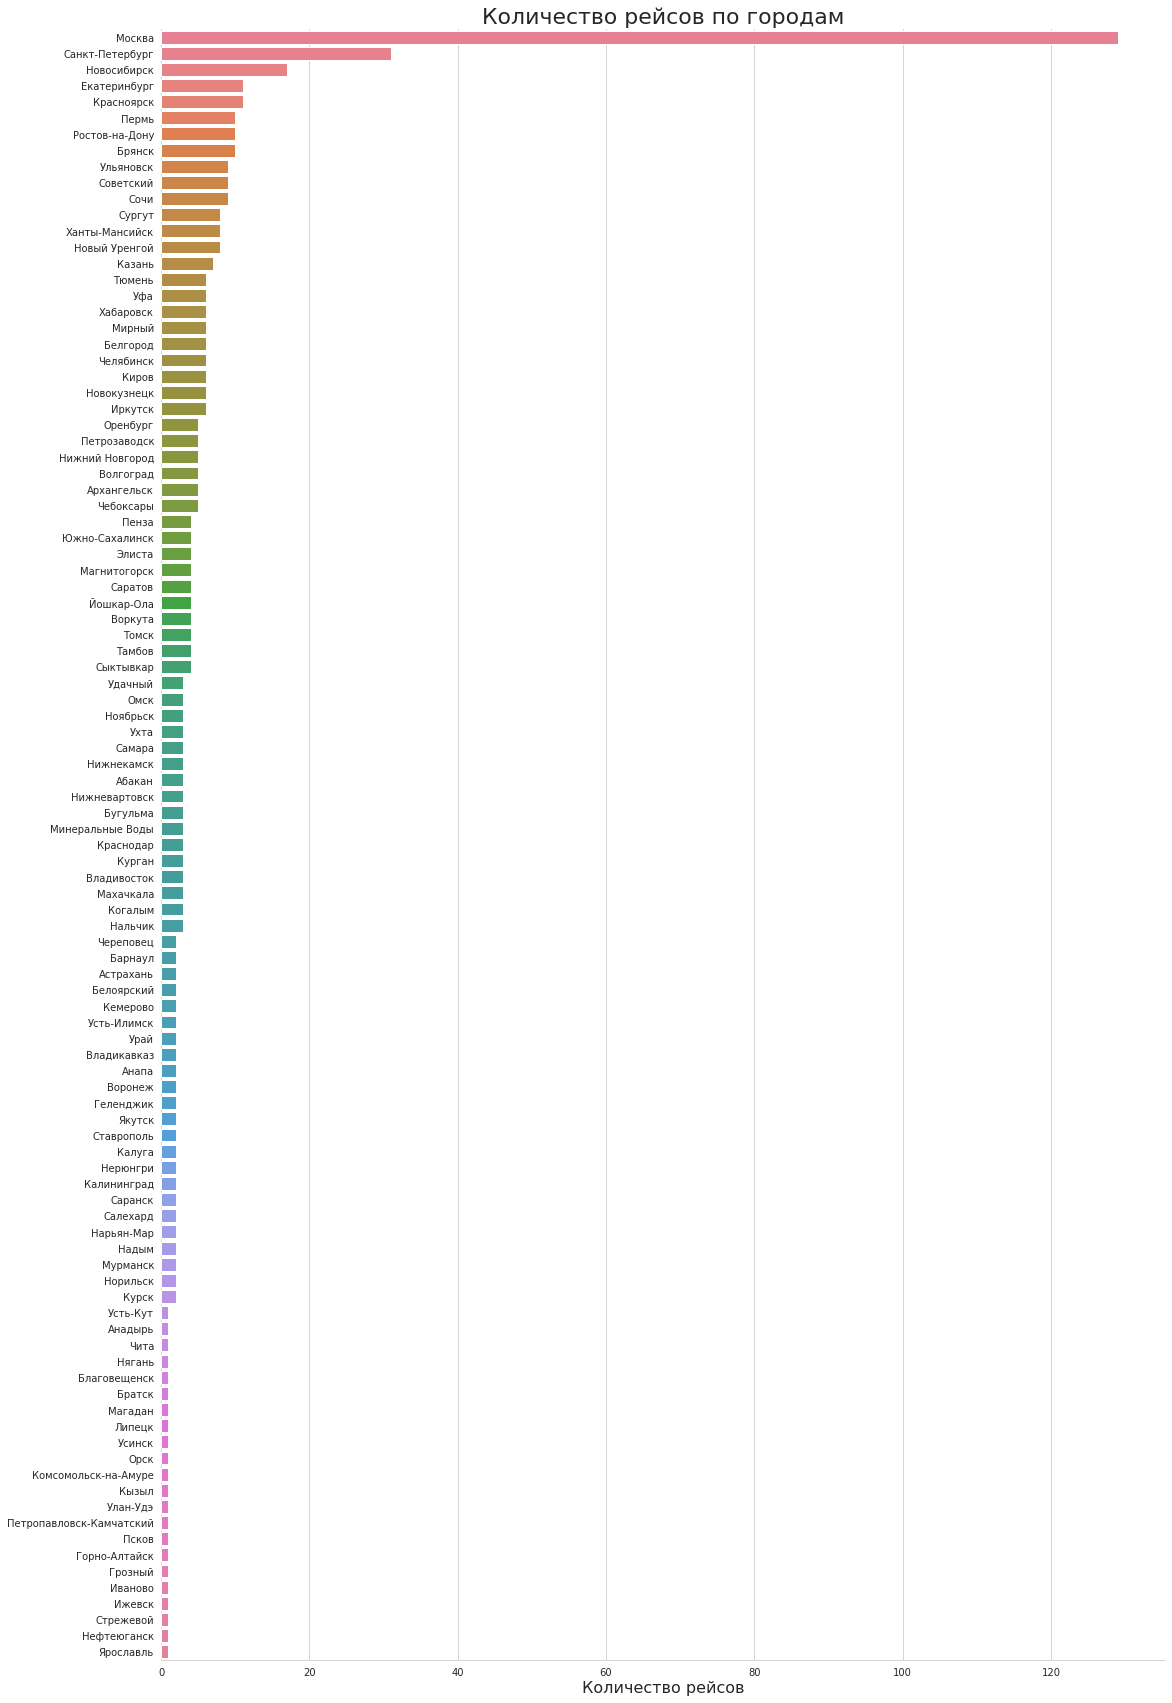

In [15]:
# построим график с городами и количеством рейсов
city_flights = query_3.sort_values(by='average_flights', ascending=False)

plt.figure(figsize=(18, 30))
plt.title('Количество рейсов по городам', fontsize=22)
sns.barplot(x='average_flights', y='city', data=city_flights, palette='husl')
sns.despine(left=True)
plt.ylabel('')
plt.xlabel('Количество рейсов', fontsize=16)
plt.show()

**Вывод:**  
По количеству рейсов лидирует Москва, оттуда совершается в 4,16 раз больше перелетов, чем из Санкт-Петербурга, который находится на втором месте.  
Количество рейсов связано с числом жителей города - чем больше жителей, тем больше перелетов.

# Общий вывод

С большим отрывом по количеству рейсов лидирует Москва.  
Кроме того в тройку лидеров входят Санкт-Петербург и Новосибирск.  
В оставшихся городах примерно равное количество перелетов.  
Количество рейсов связано с числом жителей города - чем больше жителей, тем больше перелетов.  
  
Больше всего перелетов совершают следующие модели самолетов: Cessna 208 Caravan (13 мест), Bombardier CRJ-200 (40-50 мест), Sukhoi SuperJet-100 (93-103 места). Скорее всего, это связано с тем, что в данных самолетах меньше всего посадочных мест, и они летают на небольшие расстояния, поэтому совершают больше перелетов.
Самолеты с большим количеством посадочных мест летают в разы реже - Airbus A319-100 (138 мест), Airbus A321-200 (220 мест), Boeing 737-300 (149 мест), Boeing 767-300 (330 мест), Boeing 777-300 (305-550 мест). Это связано с тем, что их перелеты длятся дольше. Меньше всего перелетов у самого вместительного самолета - Boeing 777-300 (305-550 мест).  
  
